In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
original_df = pd.read_csv('original_data/compas/compas-scores-two-years.csv',index_col = 0)
original_df.columns

Index(['name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age',
       'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date',
       'c_arrest_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree',
       'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
       'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [37]:
#keep_cols = ['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'is_recid',
#             'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out']
keep_cols = ['sex', 'age', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'c_charge_degree',
             'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out']
df = original_df[keep_cols]

# Get the days in jail
days_in_jail = pd.to_datetime(df['c_jail_out'])-pd.to_datetime(df['c_jail_in'])
days_in_jail = [x.round("D").days for x in days_in_jail]
df['days_in_jail'] = days_in_jail
df = df.drop(['c_jail_in', 'c_jail_out'],axis=1)

# drop cells with empty rows
print("Before dropping empty cells: ", df.shape)
df = df.dropna()
print("After dropping empty cells: ", df.shape)

# get abs val of screening arrest
df['days_b_screening_arrest'] = abs(df['days_b_screening_arrest'])
df = df[df['days_b_screening_arrest']<=30]

# Binarize Race
df['race'] = ['White' if x == 'Caucasian' else 'Non-White' for x in df['race']]

Before dropping empty cells:  (7214, 11)
After dropping empty cells:  (6907, 11)


/scratch/local/59878429/ipykernel_65361/994657287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_in_jail'] = days_in_jail


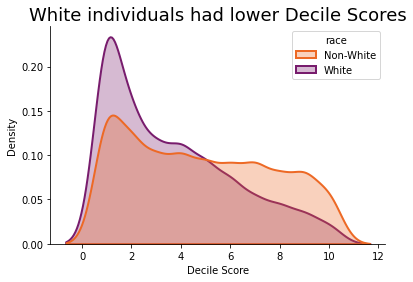

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.kdeplot(data=df,
                 x='decile_score',
                 hue='race',
                 fill=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                 ax = ax,
                );
ax.set_xlabel('Decile Score')
ax.set_title('White individuals had lower Decile Scores', fontsize=18)

fn = 'compas/viz/scoreDistByRace.png'
fig.savefig(fn, bbox_inches = 'tight')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fn = 'dissertation/scoreDistByRace.png'
fig.savefig(fn, bbox_inches = 'tight')

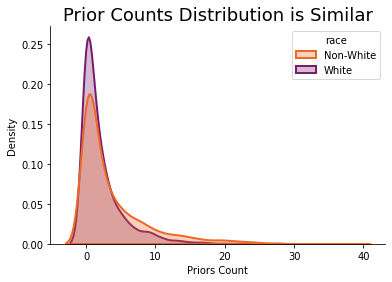

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.kdeplot(data=df,
                 x='priors_count',
                 hue='race',
                 fill=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                 ax = ax,
                );
ax.set_xlabel('Priors Count')
ax.set_title('Prior Counts Distribution is Similar', fontsize=18)

fn = 'compas/viz/priorCntsDistByRace.png'
fig.savefig(fn, bbox_inches = 'tight')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fn = 'dissertation/priorCntsDistByRace.png'
fig.savefig(fn, bbox_inches = 'tight')

/scratch/local/59878429/ipykernel_65361/2647760819.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = df[original_df['c_charge_desc']=='Battery']


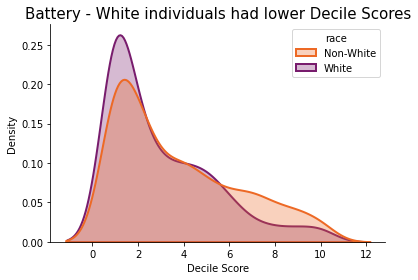

In [40]:
temp = df[original_df['c_charge_desc']=='Battery']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.kdeplot(data=temp,
                 x='decile_score',
                 hue='race',
                 fill=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                 ax = ax,
                );
ax.set_xlabel('Decile Score')
ax.set_title('Battery - White individuals had lower Decile Scores', fontsize=15)

fn = 'compas/viz/scoreDistByRace_battery.png'
fig.savefig(fn, bbox_inches = 'tight')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fn = 'dissertation/scoreDistByRace_battery.png'
fig.savefig(fn, bbox_inches = 'tight')

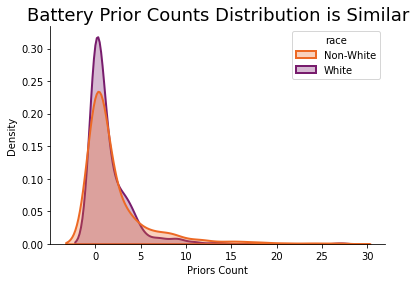

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.kdeplot(data=temp,
                 x='priors_count',
                 hue='race',
                 fill=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                 ax = ax,
                );
ax.set_xlabel('Priors Count')
ax.set_title('Battery Prior Counts Distribution is Similar', fontsize=18)

fn = 'compas/viz/priorCntsDistByRace_battery.png'
fig.savefig(fn, bbox_inches = 'tight')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fn = 'dissertation/priorCntsDistByRace_battery.png'
fig.savefig(fn, bbox_inches = 'tight')

In [42]:
df_nw_battery_describe = temp[(temp.race == 'Non-White')].describe()
df_w_battery_describe = temp[(temp.race == 'White')].describe()
print(df_nw_battery_describe)
print(df_w_battery_describe)

num_nw = int(df_nw_battery_describe.loc['count'][0])
num_w = int(df_w_battery_describe.loc['count'][0])
total = num_nw + num_w
print(f'There are {num_nw:,} non-white ({num_nw/total*100:.1f}%) and '
      f'{num_w:,} white ({num_w/total*100:.1f}%)')

              age  juv_fel_count  decile_score  juv_misd_count  \
count  682.000000     682.000000    682.000000      682.000000   
mean    33.049853       0.038123      3.715543        0.073314   
std     10.304206       0.322911      2.667258        0.379996   
min     19.000000       0.000000      1.000000        0.000000   
25%     25.000000       0.000000      1.000000        0.000000   
50%     30.000000       0.000000      3.000000        0.000000   
75%     37.000000       0.000000      6.000000        0.000000   
max     83.000000       6.000000     10.000000        5.000000   

       juv_other_count  priors_count  days_b_screening_arrest  days_in_jail  
count       682.000000    682.000000               682.000000    682.000000  
mean          0.077713      2.208211                 1.573314      5.994135  
std           0.357182      4.037714                 4.026132     17.889035  
min           0.000000      0.000000                 0.000000      0.000000  
25%           0

In [43]:
# Make numeric columns binary
df['age'] = [1 if x > 30 else 0 for x in df['age']]
"""describe = df[['juv_fel_count','juv_misd_count','juv_other_count','priors_count',
               'days_b_screening_arrest','days_in_jail']].describe()
means = describe.loc['50%']
for col,mean in zip(means.index, means):
    df[col] = [1 if x > mean else 0 for x in df[col]]"""

"describe = df[['juv_fel_count','juv_misd_count','juv_other_count','priors_count',\n               'days_b_screening_arrest','days_in_jail']].describe()\nmeans = describe.loc['50%']\nfor col,mean in zip(means.index, means):\n    df[col] = [1 if x > mean else 0 for x in df[col]]"

In [44]:
# Remove Sex
drop_col = df['sex']
df = df.drop(['sex'],axis=1)

# Dummify data - remove redundancy by dropping first
bin_df = df.copy()
bin_df = pd.get_dummies(bin_df, drop_first=True)
bin_df['decile_score'] = [1 if x < 8 else 0 for x in bin_df['decile_score']] # 1 is low risk
bin_df

# Add it back
df['sex'] = drop_col

In [45]:
# Class ratio
bin_df['decile_score'].value_counts()

1    5028
0    1144
Name: decile_score, dtype: int64

In [46]:
df

,age,race,juv_fel_count,decile_score,juv_misd_count,c_charge_degree,juv_other_count,priors_count,days_b_screening_arrest,days_in_jail,sex
id,,,,,,,,,,,
1,1,Non-White,0,1,0,F,0,0,1.0,1.0,Male
3,1,Non-White,0,3,0,F,0,0,1.0,10.0,Male
4,0,Non-White,0,4,0,F,1,4,1.0,1.0,Male
7,1,Non-White,0,1,0,M,0,0,0.0,1.0,Male
8,1,White,0,6,0,F,0,14,1.0,6.0,Male
...,...,...,...,...,...,...,...,...,...,...,...
10996,0,Non-White,0,7,0,F,0,0,1.0,2.0,Male
10997,0,Non-White,0,3,0,F,0,0,1.0,2.0,Male
10999,1,Non-White,0,1,0,F,0,0,1.0,1.0,Male


In [47]:
# Rename target column and Sex
df = df.rename(columns={"race": "Race"}) # White is 1
bin_df = bin_df.rename(columns={"race_White": "Race"}) # White is 1
bin_df = bin_df.rename(columns={"c_charge_degree_M": "c_charge_degree"}) # Misdemeanor is 1

# Move target column and protected attribute to front
col = bin_df.pop('Race')
bin_df.insert(0, 'Race', col)
col = df.pop('Race')
df.insert(0, 'Race', col)
col = bin_df.pop('decile_score')
bin_df.insert(0, 'decile_score', col)
col = df.pop('decile_score')
df.insert(0, 'decile_score', col)

# Save categorical and numeric datasets
bin_df.to_csv('data/compas_proxy_data.csv')
df.to_csv('data/compas_proxy_data_cat.csv')

In [48]:
bin_df

,decile_score,Race,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,days_in_jail,c_charge_degree
id,,,,,,,,,,
1,1,0,1,0,0,0,0,1.0,1.0,0
3,1,0,1,0,0,0,0,1.0,10.0,0
4,1,0,0,0,0,1,4,1.0,1.0,0
7,1,0,1,0,0,0,0,0.0,1.0,1
8,1,1,1,0,0,0,14,1.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...
10996,1,0,0,0,0,0,0,1.0,2.0,0
10997,1,0,0,0,0,0,0,1.0,2.0,0
10999,1,0,1,0,0,0,0,1.0,1.0,0


Now create the models

In [15]:
def train_test_audit_split(df, train_size, test_size, audit_size, outcome_column_name, group_column_name, random_state):

    if audit_size != 0:
        # split into audit and other
        df_audit, df_other = train_test_split(df,
                                              train_size = audit_size,
                                              stratify = df[[group_column_name, outcome_column_name]],
                                              random_state = random_state)
    else:
        df_audit = np.NaN
        df_other = df.copy()

    # split other into train and test
    other_size = train_size + test_size
    train_size = train_size / other_size
    test_size = test_size / other_size
    df_train, df_test = train_test_split(df_other,
                                         train_size = train_size,
                                         stratify = df_other[[group_column_name, outcome_column_name]],
                                         random_state = random_state)
    return df_train, df_audit, df_test

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

outcome_column_name = 'decile_score'
group_column_name = 'Race'

df_train, _, df_test = train_test_audit_split(bin_df, train_size=0.6, test_size=0.4, audit_size=0, 
                                              outcome_column_name=outcome_column_name, group_column_name=group_column_name, 
                                              random_state=9485)
X_train = df_train.drop([outcome_column_name,group_column_name],axis=1)
y_train = df_train[outcome_column_name]
S_train = df_train[group_column_name]

X_test = df_test.drop([outcome_column_name,group_column_name],axis=1)
y_test = df_test[outcome_column_name]
S_test = df_test[group_column_name]

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


/home/richardsonb/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.81


In [19]:
from sklearn import svm

svmCl = svm.SVC(kernel='linear') # Linear Kernel
svmCl.fit(X_train, y_train)

y_pred = svmCl.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svmCl.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.82


In [20]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print('Accuracy of MLP classifier on test set: {:.2f}'.format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on test set: 0.82


/home/richardsonb/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Now compare models

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

modelComparison = pd.DataFrame([], columns=['LR', 'RF', 'SVM', 'MLP'])
#modelComparison.loc['Compas'] = [0.84,0.82,0.83,0.81]
modelComparison.loc['Compas'] = [0.83,0.81,0.82,0.82]
modelComparison.loc['Law'] = [0.95,0.95,0.95,0.95]
modelComparison.loc['AcsIncome'] = [0.79,0.79,0.79,0.61]

modelComparison.reset_index(inplace=True)
modelComparison = modelComparison.rename(columns={"index": "Dataset"})
melt_comp = pd.melt(modelComparison, id_vars = ['Dataset'], value_vars=['LR', 'RF', 'SVM', 'MLP'], 
                         var_name='Model', value_name='Accuracy')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.barplot(x="Dataset", y="Accuracy", hue="Model", palette='inferno_r', ax = ax, data=melt_comp)
ax.set_title('All Models Performed Similar across each dataset', fontsize=18)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fn = 'compas/viz/data/compareModels.png'
fig.savefig(fn, bbox_inches = 'tight')


In [ ]:
modelComparison